#**NAME: PARTHA SAKHA PAUL**

#**ROLL: MA23M016**

**PROGRAMMING ASSIGNMENT 4**

#**Building a Neural Network from Scratch. In this exercise we build the digit recognizer neural network from scratch, using numpy, pandas and pyplot**

# **Importing necessary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# importing dataset
from keras.datasets import mnist

#**Step 1:**

    In google colab you can get the MNIST files from the keras datasets and you have to make some appropriate changes to the code to load the data from there. In any case, make sure that the gray scale values for the images are scaled in the interval [0, 1].

# Spliting data for validation and training

In [ ]:
# loading the data
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# spliting data for validation
x_val_mnist = x_train_mnist[54000:]
y_val_mnist = y_train_mnist[54000:]

# spliting data for training
x_train_mnist = x_train_mnist[:54000]
y_train_mnist = y_train_mnist[:54000]

# Plotting the dataset

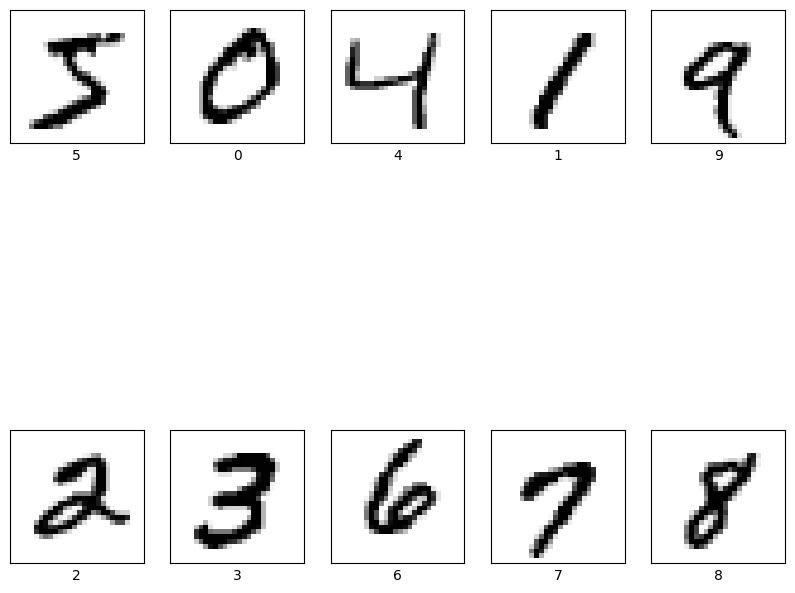

In [ ]:
# labels
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
image = []
label = []
for i in range(54000):
  if len(label) >= 10:
    break;
  if class_names[y_train_mnist[i]] not in label:
      image.append(x_train_mnist[i])
      label.append(class_names[y_train_mnist[i]])

#the dimensions of the plot grid
plt.figure(figsize=(10,10))

for i in range(len(image)):
  plt.subplot(2, 5, i+1)  #plotting in a 2x5 grid
  plt.xticks([])  #remove x-ticks
  plt.yticks([])  #remove y-ticks
  plt.grid(False)  #no grid
  plt.imshow(image[i], cmap=plt.cm.binary)  #plotting the image in binary colormap
  plt.xlabel(label[i])  #x-axis label
plt.show()

# Reshaping, Normalizing of the training and validation input dataset and One hot encoding of the corresponding output labels

In [ ]:
# vectorise the data
x_train_mnist = x_train_mnist.reshape(x_train_mnist.shape[0], 784)
# print(x_train.shape)
x_val_mnist  = x_val_mnist.reshape(x_val_mnist.shape[0], 784)
x_test_mnist = x_test_mnist.reshape(x_test_mnist.shape[0], 784)

# normalize
x_train_mnist = x_train_mnist / 255.0
x_test_mnist = x_test_mnist / 255.0
x_val_mnist  = x_val_mnist / 255.0
# print(x_train)

# One hot encoding for labels
def one_hot_enc(labels, dimension=10):
    # Creating an array of zeros of shape (number of labels, number of categories)
    one_hot_labels = np.zeros((len(labels), dimension))

    one_hot_labels[np.arange(len(labels)), labels] = 1
    return one_hot_labels



print(y_train_mnist[1023])
# one-hot encoding to the datasets
y_train_encode_mnist = one_hot_enc(y_train_mnist)
y_val_encode_mnist = one_hot_enc(y_val_mnist)
y_test_encode_mnist = one_hot_enc(y_test_mnist)

print(y_train_encode_mnist[1023])  # for verifying
print(y_train_encode_mnist.shape) #verifying

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(54000, 10)


# All necessary functions(Activation,Loss,Output)::

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def sigmoid_deriv(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def cross_entropy(y_hat, y):
    m = y.shape[0]
    logyhat = np.log(y_hat)
    loss = -np.sum(y * logyhat) / m
    return loss

# Activation and activation derivatives dictionaries

In [ ]:
activation_functions = {
    "sigmoid": sigmoid,
}

activation_derivatives = {
    "sigmoid": sigmoid_deriv,
}

# Neural Network with feedforward propagation::

In [ ]:
class NeuralNetwork:
    #initialize the network with construtor
    def __init__(self, layer_sizes, activation_func="sigmoid", weight_init="random"):
        self.layer_sizes = layer_sizes
        self.activation_func = activation_func
        self.weights, self.biases = self.init_network(layer_sizes, weight_init)

    #initializing function for weights and biases
    def init_network(self, layer_sizes, weight_init):
        weights = []
        biases = []
        # i = 0 to L-1; here len(self.layer_sizes) = L+1(input_layer+hidden_layers+output_layer)
        for i in range(len(layer_sizes) - 1):
            stddev = 0.1  # standard deviation for random initialization
            weight = np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * stddev
            bias = np.zeros((1, layer_sizes[i + 1]))
            weights.append(weight)
            biases.append(bias)
        return weights, biases

    #forward propagation
    def feedforward(self, X):
        a = {}
        h = {"h0": X}
        # i = 1 to L; here len(self.layer_sizes) = L+1(input_layer+hidden_layers+output_layer)
        for i in range(1, len(self.layer_sizes)):
            h_previous = h["h" + str(i-1)]   #input layer(data point)
            a_current = np.dot(h_previous, self.weights[i-1]) + self.biases[i-1]
            a["a" + str(i)] = a_current
            if i == len(self.layer_sizes) - 1:  # for output layer
                h_current = softmax(a_current)
            else:
                h_current = activation_functions[self.activation_func](a_current)   #sigmoid(a_current)
            h["h" + str(i)] = h_current
        y_hat = h["h" + str(len(self.layer_sizes) - 1)]
        return h, a, y_hat

# One example of probability distribution(bad distribution) over the 10 classes by feedforward NN before training the model::


In [ ]:
layer_sizes = [784, 10, 10] # means input size: 28*28=784, one hidden layer of size 10 neurons, and the output class labels 10

# initializing the model
model_forward = NeuralNetwork(layer_sizes, activation_func="sigmoid", weight_init="random")
_,_,y_hat = model_forward.feedforward(x_train_mnist)
print('A probability distribution over the 10 classes by feedforward NN before train:: \n',y_hat[5180])
# print(sum(y_hat[51]))
print('Corresponding labelled output:: \n',y_train_encode_mnist[5180])

A probability distribution over the 10 classes by feedforward NN before train:: 
 [0.09995716 0.11253809 0.09442142 0.09669404 0.10337414 0.09979037
 0.08663367 0.12065914 0.07798648 0.10794549]
Corresponding labelled output:: 
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# For backward propagation and the gradient descent


In [ ]:
# for backward propagation and the gradient descent
class backward_optimizer(NeuralNetwork):
    #backward propagation
    def backward(self, h, a, y, y_hat):
        number_hidden = len(self.layer_sizes) - 2  #excluding input and output layers
        grad = self.init_grad()

        #derivative of cross-entropy w.r.t softmax function
        da = y_hat - y

        # i = L to 1; here len(self.layer_sizes) = L+1(input_layer+hidden_layers+output_layer)
        for i in reversed(range(1, len(self.layer_sizes))):
            grad["dW" + str(i)] = np.dot(h["h" + str(i-1)].T, da) / y.shape[0]   #for normalizing, dividing by y.shape[0]
            grad["db" + str(i)] = np.sum(da, axis=0, keepdims=True) / y.shape[0]
            if i > 1:  #no need to calculate derivatives after the first hidden layer
                dh_previous = np.dot(da, self.weights[i-1].T)
                da = dh_previous * activation_derivatives[self.activation_func](a["a" + str(i-1)])
        return grad


    #gradient initializing
    def init_grad(self):
        grad = {}
        # i = 1 to L; here len(self.layer_sizes) = L+1(input_layer+hidden_layers+output_layer)
        for i in range(1, len(self.layer_sizes)):
            grad["dW" + str(i)] = np.zeros_like(self.weights[i-1])   #initializing dw1 with W1 having all zeros
            grad["db" + str(i)] = np.zeros_like(self.biases[i-1])    #initializing db1 with b1 having all zeros
        return grad

    #Gradient Descent Method
    def grad_descent(self, X_train, Y_train,X_val, Y_val_encode, max_epochs, eta, batch_size):
        train_datapoints = X_train.shape[0]  #train_datapoints = 54000

        for epoch in range(max_epochs):
            for start in range(0, train_datapoints, batch_size):
                end = min(start + batch_size, train_datapoints)
                X_batch = X_train[start:end]
                Y_batch = Y_train[start:end]

                # Forward prop
                h, a, y_hat = self.feedforward(X_batch)
                # print(h['h0'])

                # Backward prop
                grad = self.backward(h, a, Y_batch, y_hat)

                # Update weights and biases with grad_descent
                for i in range(1, len(self.layer_sizes)):
                    self.weights[i-1] -= eta * (grad["dW" + str(i)])
                    self.biases[i-1] -= eta * grad["db" + str(i)]

            # printing loss and accuracy at the end of each epoch
            loss, accuracy = self.loss_accuracy(X_train, Y_train)
            print(f"End of Epoch {epoch}, Training Loss: {loss}, Training Accuracy: {accuracy * 100}")

            # printing loss and accuracy on the validation dataset
            val_loss, val_accuracy = self.loss_accuracy(X_val, Y_val_encode)
            print(f"End of Epoch {epoch}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy * 100}")

    #loss_accuracy function
    def loss_accuracy(self, X, y):
        h, a, y_hat = self.feedforward(X)
        loss = cross_entropy(y_hat, y)

        predictions = np.argmax(y_hat, axis=1)   #finding indices of max element in each row of y_hat
        labels = np.argmax(y, axis=1)            #finding indices of max element in each row of y
        accuracy = np.mean(predictions == labels) #mean of the above two

        return loss, accuracy

    #for training the model by the optimizers
    def train(self,optimizer,max_epochs, eta,batch_size):
        if optimizer == 'grad_descent':
          self.grad_descent(x_train_mnist, y_train_encode_mnist,x_val_mnist, y_val_encode_mnist, max_epochs, eta,batch_size)

# Here 1st we have taken a small network of one hidden layer with size 10 neurons::
    input size: 28*28=784, one hidden layer of size 10 neurons, and the output class labels 10

In [ ]:
layer_sizes = [784, 10, 10]

# initializing the model
model = backward_optimizer(layer_sizes, activation_func="sigmoid", weight_init="random")

#for verifying the results

# print(model.weights[0].shape)
# print(model.weights[1].shape)
# print(model.weights[0][5])
# print(model.weights[1][99])
# print()
# print(model.biases[0].shape)
# print(model.biases[1].shape)
# print(model.biases[0][0])
# print(model.biases[1][0])

# **First you should verify that the code runs in a very similar manner as seen in the video. That is, with 500 forward/backward propagation steps and learning rate α = 0.1, the accuracy of the trained network should be about 82 to 85 percent.**

In [ ]:
#gradient descent
model.grad_descent(x_train_mnist, y_train_encode_mnist,x_val_mnist,y_val_encode_mnist, eta=0.1, max_epochs=501, batch_size=54000)
# batch size means how many datapoints will train in one epoch and
# after that it will update the weights and biases

End of Epoch 0, Training Loss: 2.30139155749906, Training Accuracy: 10.287037037037038
End of Epoch 0, Validation Loss: 2.3018805051237217, Validation Accuracy: 10.533333333333333
End of Epoch 1, Training Loss: 2.300212914282717, Training Accuracy: 10.318518518518518
End of Epoch 1, Validation Loss: 2.3006839401392147, Validation Accuracy: 10.6
End of Epoch 2, Training Loss: 2.299051200883306, Training Accuracy: 10.362962962962962
End of Epoch 2, Validation Loss: 2.299503336248518, Validation Accuracy: 10.633333333333333
End of Epoch 3, Training Loss: 2.297904951480522, Training Accuracy: 10.411111111111111
End of Epoch 3, Validation Loss: 2.2983372556071404, Validation Accuracy: 10.7
End of Epoch 4, Training Loss: 2.2967727904067625, Training Accuracy: 10.49074074074074
End of Epoch 4, Validation Loss: 2.2971843492983797, Validation Accuracy: 10.733333333333334
End of Epoch 5, Training Loss: 2.2956534246292097, Training Accuracy: 10.57037037037037
End of Epoch 5, Validation Loss: 2.29

# In the hope to get a higher accuracy, enlarge the neural network, by adding an additional hidden layer and adding more interior nodes. Try 20 nodes in the first and 10 nodes in the second hidden layer. Run propagation with 1000 steps and learning rate α = 0.1. How much improvement does the larger network provide? Turn in your code for the larger dataset and some printout that documents the accuracy rate.



    input size: 28*28=784, two hidden layers of size 20 and 10 neurons, and the output class labels 10

In [ ]:
layer_sizes = [784,20,10, 10]

# initializing the model
model = backward_optimizer(layer_sizes, activation_func="sigmoid", weight_init="random")

In [ ]:
model.grad_descent(x_train_mnist, y_train_encode_mnist,x_val_mnist,y_val_encode_mnist, eta=0.1, max_epochs=1001, batch_size=5400)
# batch size means how many datapoints will train in one epoch and
# after that it will update the weights and biases

End of Epoch 0, Training Loss: 2.305780214149115, Training Accuracy: 11.318518518518518
End of Epoch 0, Validation Loss: 2.3061144364466144, Validation Accuracy: 10.5
End of Epoch 1, Training Loss: 2.3032914159901265, Training Accuracy: 11.318518518518518
End of Epoch 1, Validation Loss: 2.3037570064233535, Validation Accuracy: 10.5
End of Epoch 2, Training Loss: 2.30204878771895, Training Accuracy: 11.318518518518518
End of Epoch 2, Validation Loss: 2.3026159230124765, Validation Accuracy: 10.5
End of Epoch 3, Training Loss: 2.3013818826461296, Training Accuracy: 11.318518518518518
End of Epoch 3, Validation Loss: 2.302024042604937, Validation Accuracy: 10.5
End of Epoch 4, Training Loss: 2.3009802465328444, Training Accuracy: 11.318518518518518
End of Epoch 4, Validation Loss: 2.3016761177461396, Validation Accuracy: 10.5
End of Epoch 5, Training Loss: 2.300700358742288, Training Accuracy: 11.318518518518518
End of Epoch 5, Validation Loss: 2.3014337159286486, Validation Accuracy: 10

#**Yes the larger network is giving much good performance than the smaller one.**

    It is giving 94% nearly(Validation Accuracy) whereas the previous smaller network is giving 80% nearly(Validation Accuracy).


    Hence the validation accuracy is increased after increasing one hidden layer